# Voting for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)
- DecisionTree
- RandomForestTree
- SVMs

In [8]:
%store -r model_rft
%store -r model_dt
%store -r model_svm
%store -r data
%store -r data_test

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)

X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
X_train_submission = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y_train_submission = data_dt['Injeção na rede (kWh)'].to_frame()
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [10]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm',model_svm),('dt',model_dt),('rft',model_rft)]
vc=VotingClassifier(estimators,voting='soft',weights=[1,0.4,1.3])
vc.fit(X_train,y_train)

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=2021)),
                             ('dt', DecisionTreeClassifier(random_state=2021)),
                             ('rft',
                              RandomForestClassifier(random_state=2021))],
                 weights=[1, 0.4, 1.3])

In [11]:
predictions = vc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score

import matplotlib.pyplot as plt
def stats_confusion_matrix(predictions,y_test):
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.84 accuracy
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1933
           1       0.44      0.16      0.24       110
           2       0.55      0.55      0.55       276
           3       0.55      0.63      0.59       292
           4       0.58      0.48      0.52       143

    accuracy                           0.84      2754
   macro avg       0.61      0.56      0.57      2754
weighted avg       0.83      0.84      0.83      2754



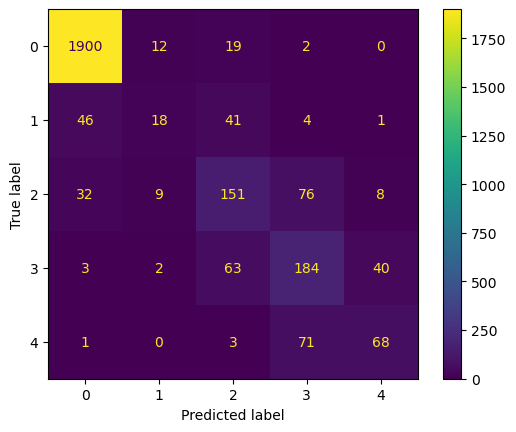

In [13]:
stats_confusion_matrix(predictions,y_test)

In [14]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)
predictions_vc = vc.predict(X_test_submission)
gera_csv(predictions_vc,'grupo20_vc.csv')